# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [3]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv



In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

In [3]:
type(map_box_api)

str

## Load Data

In [4]:
# Read the census data into a Pandas DataFrame
file_path_1 = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path_1, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [5]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)

dwelling_types_df=to_data.groupby(by='year',level=None).sum()
dwelling_types_df

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  average_house_value  shelter_costs_owned  \
year                                                          
2001         3040             40583604               118563   
2006         1335             59368353               184352   
2011         2165             74259461               202750   
2016         2845             92969566               246584   

      shelter_costs_rented  
year                        
2001                152031  
2006                129558  
2011                142771  
2016                175885

In [6]:
# Save the dataframe as a csv file
dwelling_types_df=pd.DataFrame(dwelling_types_df)
dwelling_types_df.to_csv('Data/dwelling_types_df.csv')
dwelling_types_df

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  average_house_value  shelter_costs_owned  \
year                                                          
2001         3040             40583604               118563   
2006         1335             59368353               184352   
2011         2165             74259461               202750   
2016         2845             92969566               246584   

      shelter_costs_rented  
year                        
2001                152031  
2006                129558  
2011                142771  
2016                175885

In [7]:
# Helper create_bar_chart function
def create_bar_chart(xdata,ydata, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    
    """
  

    

In [8]:
columns=['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']
dwelling_types=dwelling_types_df[columns]
dwelling_types.head()


single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [9]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001

fig=plt.figure()
ax=fig.add_axes([0,10,1,1])
housing_types=dwelling_types.columns
dwelling_type_units=dwelling_types.iloc[0].values
ax.bar(housing_types,dwelling_type_units,color='r')
ax.set_title('Dwelling types in Toronto 2001')
ax.set_ylabel('Dwelling Type Units')
ax.set_xlabel('2001')
plt.xticks(rotation=90)
plt.show()
# Bar chart for 2006
fig=plt.figure()
ax=fig.add_axes([0,10,1,1])
housing_types=dwelling_types.columns
dwelling_type_units=dwelling_types.iloc[1].values
ax.bar(housing_types,dwelling_type_units,color='g')
ax.set_title('Dwelling types in Toronto 2006')
ax.set_ylabel('Dwelling Type Units')
ax.set_xlabel('2006')
plt.xticks(rotation=90)
plt.show()

# Bar chart for 2011
fig=plt.figure()
ax=fig.add_axes([0,10,1,1])
housing_types=dwelling_types.columns
dwelling_type_units=dwelling_types.iloc[2].values
ax.bar(housing_types,dwelling_type_units,color='y')
ax.set_title('Dwelling types in Toronto 2011')
ax.set_ylabel('Dwelling Type Units')
ax.set_xlabel('2011')
plt.xticks(rotation=90)
plt.show()

# Bar chart for 2016
fig=plt.figure()
ax=fig.add_axes([0,10,1,1])
housing_types=dwelling_types.columns
dwelling_type_units=dwelling_types.iloc[3].values
ax.bar(housing_types,dwelling_type_units,color='m')
ax.set_title('Dwelling types in Toronto 2016')
ax.set_ylabel('Dwelling Type Units')
ax.set_xlabel('2016')
plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [ ]:
# Calculate the average monthly shelter costs for owned and rented dwellings
avg_monthly_shelter_costs=to_data[['shelter_costs_owned','shelter_costs_rented']].groupby(by='year',level=None).mean()
avg_monthly_shelter_costs

In [ ]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """

In [ ]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
import numpy as np
ypoints = np.array([846.878571,1316.800000,1448.214286,1761.314286])
xpoints=np.array([2001,2006,2011,2016])
plt.plot(xpoints,ypoints, color = 'm')
plt.xlabel("Year")
plt.ylabel("Avg Monthly Shelter Costs")
plt.title("Average Monthly Shelter Costs For Owned Dwellings In Toronto")
plt.show()

# Line chart for rented dwellings
ypoints = np.array([1085.935714,925.414286,1019.792857,1256.321429])
xpoints=np.array([2001,2006,2011,2016])
plt.plot(xpoints,ypoints, color = 'g')
plt.xlabel("Year")
plt.ylabel("Avg Monthly Shelter Costs")
plt.title("Average Monthly Shelter Costs For Rented Dwellings In Toronto")
plt.show()

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [ ]:
# Calculate the average house value per year
avg_house_value=to_data[['average_house_value']].groupby(by='year',level=None).mean()
avg_house_value

In [ ]:
# Plot the average house value per year as a line chart
ypoints = np.array([289882.885714,424059.664286,530424.721429,664068.328571])
xpoints=np.array([2001,2006,2011,2016])
plt.plot(xpoints,ypoints, color = 'hotpink')
plt.xlabel("Year")
plt.ylabel("Avg House Value")
plt.title("Average House Value In Toronto")
plt.show()

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [ ]:
# Create a new DataFrame with the mean house values by neighbourhood per year
tor_data_new = to_data.groupby([to_data.index, 'neighbourhood']).mean()
tor_sales = tor_data_new['average_house_value']
tor_sales_df = pd.DataFrame(tor_sales).reset_index()
tor_sales_df.head(10)

In [ ]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
tor_sales_df.hvplot.line(x='year',y='average_house_value',groupby='neighbourhood')

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [ ]:
# Fetch the data of all dwelling types per year
to_data=pd.read_csv(file_path_1)
to_data.head()

In [ ]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
list_dwellings = ['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']
to_data.hvplot.bar('year',list_dwellings,groupby='neighbourhood',rot=90,stacked=False,xlabel='Year',ylabel='Dwelling Type Units',height=400, width=700)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [ ]:
# Getting the data from the top 10 expensive neighbourhoods
to_data_2 = pd.read_csv(file_path_1, index_col='neighbourhood')
top10_expen_neighb = to_data_2.groupby(by=['neighbourhood']).mean()
top10_expen_neighb.sort_values(by='average_house_value', ascending=False, inplace=True)
top10_expen_neighb.reset_index(inplace=True)
top10_expen_neighb = top10_expen_neighb.head(10)
top10_expen_neighb.drop(columns='year', inplace=True)
top10_expen_neighb

In [ ]:
# Plotting the data from the top 10 expensive neighbourhoods
top10_expen_neighb_plot=top10_expen_neighb.hvplot.bar(x='neighbourhood',y='average_house_value',rot=90,ylim=[0,1600000],title='Top 10 Expensive Neighbourhoods',height=600, width=400)
top10_expen_neighb_plot

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [ ]:
# Load neighbourhoods coordinates data
file_path_2 = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path_2)
df_neighbourhood_locations.head()

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [ ]:
# Calculate the mean values for each neighborhood
each_neighbourhood = to_data.groupby(by='neighbourhood').mean()
each_neighbourhood.reset_index(inplace=True)
each_neighbourhood.head()

In [ ]:
# Join the average values with the neighbourhood locations
each_neighbourhood = pd.merge(df_neighbourhood_locations, each_neighbourhood, on='neighbourhood')
each_neighbourhood.head()

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [7]:
# Create a scatter mapbox to analyze neighbourhood info
px.set_mapbox_access_token(map_box_api)
map_scatter = px.scatter_mapbox(each_neighbourhood,
    lat='lat',
    lon='lon',
    size='average_house_value',
    color='shelter_costs_rented',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name='neighbourhood',
    title='Averange House Values in Toronto',
)
map_scatter.show()

NameError: name 'map_box_api' is not defined

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [6]:
to_data = pd.read_csv(file_path_1)
to_data_3 = to_data.groupby(['year','average_house_value'],as_index=False,)[['neighbourhood']].sum()
to_data_3.head()
barchart=px.bar(to_data_3,
        x='neighbourhood',
        y='average_house_value',height=1000,
        color='average_house_value',
        orientation='v',
        facet_row='year',
        facet_row_spacing=0.007,
        title='Average Toronto House Value Per Neighbourhood')
figure = barchart
figure.update_xaxes(categoryorder='category ascending')
figure.show()

NameError: name 'file_path_1' is not defined

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [4]:
# Fetch the data from all expensive neighbourhoods per year.
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
all_expen_neighb = pd.read_csv(file_path)
all_expen_neighb.sort_values(by='average_house_value', ascending=True, inplace=False)
all_expen_neighb.head()

year                 neighbourhood  single_detached_house  \
0  2001               Agincourt North                   3715   
1  2001  Agincourt South-Malvern West                   3250   
2  2001                     Alderwood                   3175   
3  2001                         Annex                   1060   
4  2001             Banbury-Don Mills                   3615   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                         1480                 0                 1055   
1                         1835                 0                  545   
2                          315                 0                  470   
3                         6090                 5                 1980   
4                         4465                 0                  240   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0       1295     195                          185            5   
1        455     105                          425            0   
2         50     185                          370            0   
3        605     275                         3710          165   
4        380      15                         1360            0   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0               200388                  810                   870  
1               203047                  806                   892  
2               259998                  817                   924  
3               453850                 1027                  1378  
4               371864                 1007                  1163

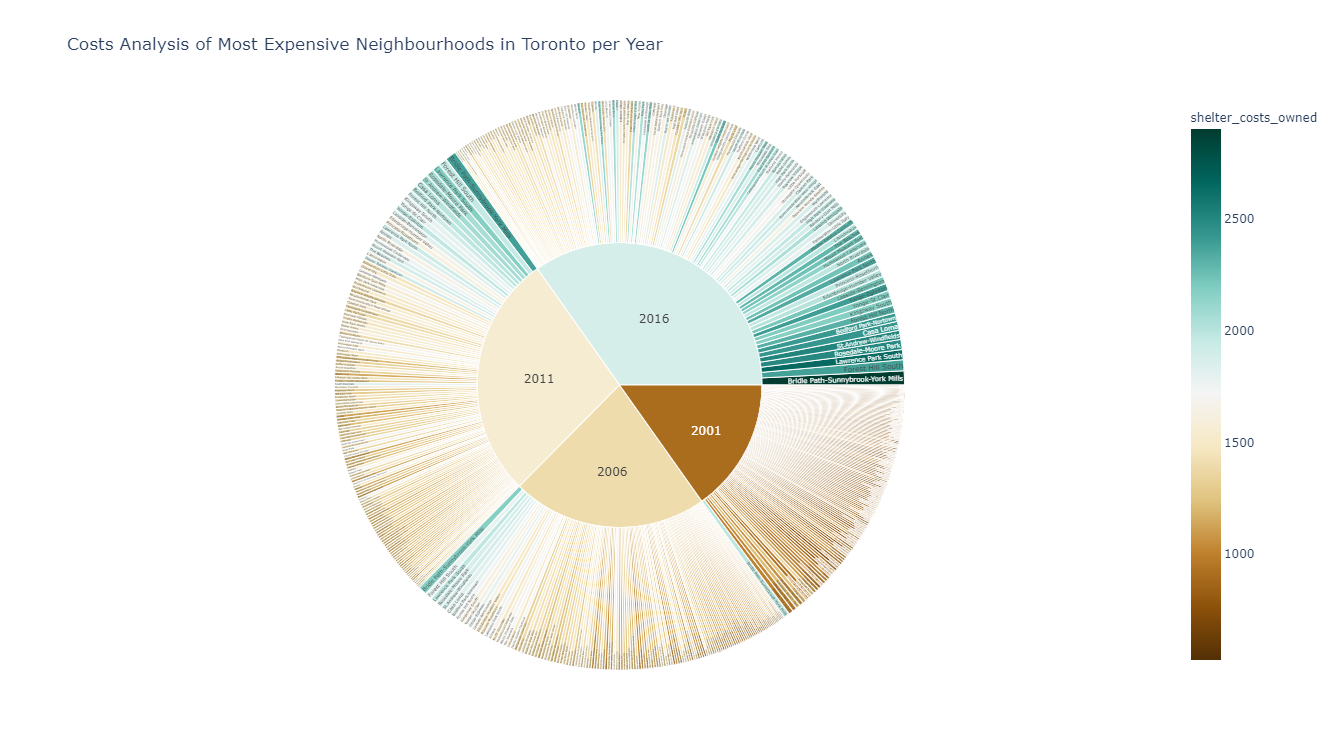

In [5]:
# Create the sunburst chart
fig = px.sunburst(all_expen_neighb,
                  path=["year", "neighbourhood"],
                  values='average_house_value',
                  width=750, height=750,
                  color_continuous_scale="BrBG",
                  color='shelter_costs_owned',
                  title="Costs Analysis of Most Expensive Neighbourhoods in Toronto per Year"
                  )
fig.show()